In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import math
from numpy import genfromtxt
import png
from numpy import genfromtxt
from PIL import Image    
from matplotlib.colors import ListedColormap

In [43]:
# Read in csv
calibri_df = pd.read_csv('CALIBRI.csv')
courier_df = pd.read_csv('COURIER.csv')
times_df = pd.read_csv('TIMES.csv')

#Display Dataframe
calibri_df.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,CALIBRI,CALIBRI LIGHT,65059,0.4,0,0.0,41,20,7,27,...,255,255,255,86,1,1,1,1,1,1
1,CALIBRI,CALIBRI LIGHT,65058,0.4,0,0.0,40,0,5,20,...,1,1,1,1,1,1,1,1,255,255
2,CALIBRI,CALIBRI LIGHT,65057,0.4,0,0.0,38,20,10,29,...,1,1,1,1,1,1,1,1,97,255
3,CALIBRI,CALIBRI LIGHT,65056,0.4,0,0.0,38,0,6,20,...,1,1,1,1,1,1,1,1,1,1
4,CALIBRI,CALIBRI LIGHT,64260,0.4,0,0.0,38,22,46,46,...,145,255,45,1,1,1,1,1,189,255


# Data Cleaning and Preparation

In [44]:
dataframes = [calibri_df, courier_df, times_df]

discard = ['fontVariant', 'm_label', 'orientation', 'm_top', 'm_left', 'originalH', 'originalW', 'h', 'w']

calibri_df.drop(columns = discard, inplace = True)
courier_df.drop(columns = discard, inplace = True)
times_df.drop(columns = discard, inplace = True)

In [45]:
print(calibri_df[calibri_df.isnull().any(axis=1)])
print(courier_df[courier_df.isnull().any(axis=1)])
print(times_df[times_df.isnull().any(axis=1)])

Empty DataFrame
Columns: [font, strength, italic, r0c0, r0c1, r0c2, r0c3, r0c4, r0c5, r0c6, r0c7, r0c8, r0c9, r0c10, r0c11, r0c12, r0c13, r0c14, r0c15, r0c16, r0c17, r0c18, r0c19, r1c0, r1c1, r1c2, r1c3, r1c4, r1c5, r1c6, r1c7, r1c8, r1c9, r1c10, r1c11, r1c12, r1c13, r1c14, r1c15, r1c16, r1c17, r1c18, r1c19, r2c0, r2c1, r2c2, r2c3, r2c4, r2c5, r2c6, r2c7, r2c8, r2c9, r2c10, r2c11, r2c12, r2c13, r2c14, r2c15, r2c16, r2c17, r2c18, r2c19, r3c0, r3c1, r3c2, r3c3, r3c4, r3c5, r3c6, r3c7, r3c8, r3c9, r3c10, r3c11, r3c12, r3c13, r3c14, r3c15, r3c16, r3c17, r3c18, r3c19, r4c0, r4c1, r4c2, r4c3, r4c4, r4c5, r4c6, r4c7, r4c8, r4c9, r4c10, r4c11, r4c12, r4c13, r4c14, r4c15, r4c16, ...]
Index: []

[0 rows x 403 columns]
Empty DataFrame
Columns: [font, strength, italic, r0c0, r0c1, r0c2, r0c3, r0c4, r0c5, r0c6, r0c7, r0c8, r0c9, r0c10, r0c11, r0c12, r0c13, r0c14, r0c15, r0c16, r0c17, r0c18, r0c19, r1c0, r1c1, r1c2, r1c3, r1c4, r1c5, r1c6, r1c7, r1c8, r1c9, r1c10, r1c11, r1c12, r1c13, r1c14, r1c15, 

In [46]:
cl1 = calibri_df[(calibri_df["strength"] == 0.4) & (calibri_df['italic'] == 0)]
cl2 = courier_df[(courier_df['strength'] == 0.4) & (courier_df['italic'] == 0)]
cl3 = times_df[(times_df['strength'] == 0.4) & (times_df['italic'] == 0)]

In [47]:
print(len(cl1), len(cl2), len(cl3))

4768 4262 4805


In [48]:
df = pd.concat([cl1, cl2, cl3], ignore_index=True)

# Part 0

In [49]:
scaler = StandardScaler()
scaler.fit(df.iloc[:,3:])
sdf = scaler.transform(df.iloc[:,3:])

In [50]:
sdf = pd.DataFrame(sdf, columns = df.iloc[:,3:].columns)
corr_sdf = sdf.corr().abs()

In [51]:
pd.DataFrame(corr_sdf.unstack().sort_values(kind = 'quicksort', ascending=False).drop_duplicates()[0:11])

0
r19c19 r19c19  1.000000
r19c18 r19c19  0.943205
r19c1  r19c0   0.934096
r0c0   r0c1    0.924243
r12c1  r13c1   0.915239
       r11c1   0.907932
r9c1   r10c1   0.906063
r12c2  r13c2   0.903615
r11c1  r10c1   0.902662
r11c0  r10c0   0.902347
r9c0   r8c0    0.900860

In [52]:
sdf = sdf.join(df.iloc[:,0])

# Part 1

In [53]:
cl1_train, cl1_test, font1_train, font1_test = train_test_split(sdf[sdf['font'] == 'CALIBRI'].iloc[:,0:400], sdf[sdf['font'] == 'CALIBRI'].iloc[:,400], test_size=0.2, random_state=0)
cl2_train, cl2_test, font2_train, font2_test = train_test_split(sdf[sdf['font'] == 'COURIER'].iloc[:,0:400], sdf[sdf['font'] == 'COURIER'].iloc[:,400], test_size=0.2, random_state=0)
cl3_train, cl3_test, font3_train, font3_test = train_test_split(sdf[sdf['font'] == 'TIMES'].iloc[:,0:400], sdf[sdf['font'] == 'TIMES'].iloc[:,400], test_size=0.2, random_state=0)

In [54]:
X_train = pd.concat([cl1_train, cl2_train, cl3_train])
X_test = pd.concat([cl1_test, cl2_test, cl3_test])
y_train = pd.concat([font1_train, font2_train, font3_train])
y_test = pd.concat([font1_test, font2_test, font3_test])

In [55]:
X_train.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
2866,-0.529333,0.125207,0.791422,1.062006,1.503937,1.403837,1.328664,1.246804,0.491816,0.278844,...,0.133828,0.376503,1.176595,1.291863,1.387684,1.509520,1.601082,1.635486,0.988515,0.933908
1790,-0.589977,-0.658418,-0.698389,-0.743209,-0.623159,-0.588181,0.243396,0.434999,1.166758,1.088078,...,-0.004876,1.049437,1.176595,1.088398,-0.941378,-0.834747,-0.774850,-0.727971,-0.677930,-0.619864
2217,-0.589977,-0.658418,-0.698389,-0.743209,-0.814872,-0.885632,-0.968487,-1.019113,-1.059676,-1.098574,...,0.948711,1.049437,1.176595,1.291863,1.002564,0.494286,0.572135,0.295573,-0.367237,-0.551887
2740,-0.589977,-0.658418,-0.698389,-0.743209,-0.814872,-0.885632,-0.968487,-1.019113,-0.253251,1.088078,...,0.948711,-0.366347,-1.109834,-1.057231,-0.941378,-0.834747,-0.774850,0.993445,1.713465,1.846749
4289,-0.589977,-0.554564,0.754177,1.620320,1.503937,1.403837,0.243396,-1.019113,-1.059676,-1.098574,...,0.948711,1.049437,1.176595,0.311532,0.305679,-0.484030,-0.690664,-0.727971,-0.677930,-0.619864


In [16]:
k = 7

In [17]:
classifier = KNeighborsClassifier(n_neighbors=k)

In [18]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [19]:
y_pred = classifier.predict(X_train)

In [20]:
y_pred_test = classifier.predict(X_test)

In [21]:
print(accuracy_score(y_true = y_train, y_pred = y_pred))
print(accuracy_score(y_true = y_test, y_pred = y_pred_test))

0.8555164001084304
0.8059971098265896


In [22]:
k = [5,6,7,8,9,10]
train_perf_k = []
test_perf_k = []

In [23]:
for i in k:
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    train_perf_k.append(classifier.predict(X_train))
    test_perf_k.append(classifier.predict(X_test))

In [24]:
train_perf_k2 = []
test_perf_k2 = []
for i in train_perf_k:
    train_perf_k2.append(accuracy_score(y_true = y_train, y_pred = i))
for i in test_perf_k:
    test_perf_k2.append(accuracy_score(y_true = y_test, y_pred = i))

In [25]:
train_perf_k2

[0.8796421794524262,
 0.8647329899701817,
 0.8555164001084304,
 0.8470226800397579,
 0.8402457757296466,
 0.8289509352127948]

In [26]:
test_perf_k2

[0.8135838150289018,
 0.8096098265895953,
 0.8059971098265896,
 0.7947976878612717,
 0.7922687861271677,
 0.784320809248555]

In [27]:
for i in range(0, len(train_perf_k2)):
    print(train_perf_k2[i] - test_perf_k2[i])

0.06605836442352442
0.055123163380586315
0.04951929028184088
0.052224992178486196
0.04797698960247898
0.044630125964239875


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

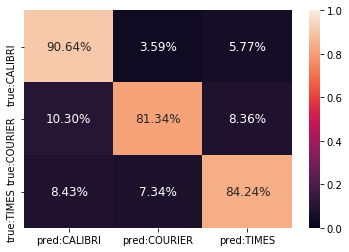

In [41]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(y_true=y_train,y_pred = train_perf_k[2], labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 12}, vmin = 0, vmax = 1)
axes.set_title("Ordinary Distance - Train CM")

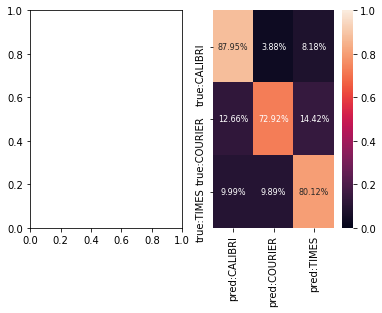

In [29]:
plt.subplots(1, 2)
cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = test_perf_k[2], labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])


sns.heatmap(cmtx_a_test, annot=True, fmt = '.02%', annot_kws={"size": 8}, vmin = 0, vmax = 1)

In [ ]:
# Aesthetics
sns.set_style("whitegrid")

In [ ]:
sns.lineplot(x = k, y = test_perf_k2, color = 'blue', label = "K:[5,..100]")
plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
plt.xlim(0, 100)

In [56]:
k_N = [5, 10 , 15, 20, 30, 40, 50 , 100]
trainperf_N = []
testperf_N = []

for i in k_N:
    # Fitting classifier to the Training set
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred_test = classifier.predict(X_test)
    # computing the % of correct classification on test set to a list & printing results
    testperf_N.append(accuracy_score(y_test, y_pred_test))
    
    y_pred_train = classifier.predict(X_train)
    trainperf_N.append(accuracy_score(y_train, y_pred_train))

In [59]:
trainperf_N

[0.8796421794524262,
 0.8289509352127948,
 0.8024758290412939,
 0.7831390620764435,
 0.7544049878015723,
 0.7311827956989247,
 0.7127496159754224,
 0.6595283274600162]

In [58]:
testperf_N

[0.8135838150289018,
 0.784320809248555,
 0.7673410404624278,
 0.7528901734104047,
 0.7348265895953757,
 0.7225433526011561,
 0.7084537572254336,
 0.6564306358381503]

(0, 100)

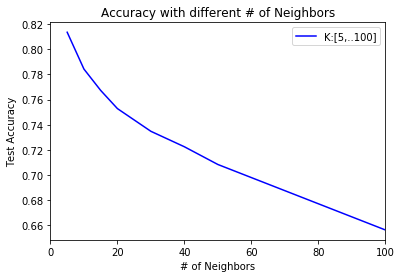

In [61]:
sns.lineplot(x = k_N, y = testperf_N, color = 'blue', label = "K:[5,..100]")
plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
plt.xlim(0, 100)

In [ ]:
for i in range(0, len(testperf_N)):
    print(k_N[i], trainperf_N[i] - testperf_N[i])

In [ ]:
f, ax = plt.subplots(1, 1)

sns.lineplot(x = k_N, y = trainperf_N, color="blue", label="Train Performance")
sns.lineplot(x = k_N, y = testperf_N, color="red", label="Test Performance")

plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
ax.legend()
plt.savefig('Accuracy_with_K_ab.png')


plt.show()

In [ ]:
f, ax = plt.subplots(1, 1)

sns.lineplot(x = k, y = test_perf_k2, color="blue", label="K:[5,..100]")
sns.lineplot(x = k_N, y = testperf_N, color="red", label="K:[5,..,10]")

plt.title('Accuracy with different # of Neighbors')
plt.xlabel('# of Neighbors')
plt.ylabel('Test Accuracy')
plt.xlim(0, 100)
ax.legend()
plt.savefig('Accuracy_with_K_ab.png')


plt.show()

In [ ]:
testperf_df_N = pd.DataFrame({'k': k_N,
                              'test_perf': testperf_N})
testperf_df_N = testperf_df_N.sort_values(by = ['test_perf'], ascending = False)

In [ ]:
kbest = 7

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = kbest)
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [ ]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(y_true=y_train,y_pred = y_pred_train, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
cmtx_a_train

In [ ]:
sns.heatmap(cmtx_a_train, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('cmtx_train.png')

In [ ]:
N = len(y_train[y_train == 'CALIBRI'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[0] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_train[y_train == 'COURIER'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[1] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_train[y_train == 'TIMES'])
p_N = np.diagonal(confusion_matrix(y_true = y_train, y_pred = y_pred_train))[2] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
confusion_matrix(y_true = y_test, y_pred = y_pred_test)

In [ ]:
cmtx_a_test = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = y_pred_test, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
cmtx_a_test

In [ ]:
sns.heatmap(cmtx_a_test, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('cmtx_test.png')

In [ ]:
p_N = sum(np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))) / len(y_test)
N = len(y_test)
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.95, loc=p_N, scale=sigma)

In [ ]:
p_N = sum(np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))) / len(y_test)
N = len(y_test)
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'CALIBRI'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[0] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.90, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'COURIER'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[1] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.9, loc=p_N, scale=sigma)

In [ ]:
N = len(y_test[y_test == 'TIMES'])
p_N = np.diagonal(confusion_matrix(y_true = y_test, y_pred = y_pred_test))[2] / N
sigma = math.sqrt(((p_N * (1 - p_N)) / N))
stats.norm.interval(alpha = 0.9, loc=p_N, scale=sigma)

In [ ]:
cols = list(X_train.iloc[:,:].columns)
cols_split = np.array_split(cols, 40)
cols_split_part1 = cols_split[0:20]
cols_split_part2 = cols_split[20:40]

In [ ]:
PACK1 = np.concatenate(cols_split_part1[0::2]).tolist()
PACK2 = np.concatenate(cols_split_part1[1::2]).tolist()
PACK3 = np.concatenate(cols_split_part2[0::2]).tolist()
PACK4 = np.concatenate(cols_split_part2[1::2]).tolist()

In [ ]:
Packs = [PACK1, PACK2, PACK3, PACK4]
W = []

In [ ]:
for i in range(len(Packs)):
    # Fitting classifier to the Training set
    classifier = KNeighborsClassifier(n_neighbors = kbest)
    classifier.fit(X_train[Packs[i]], y_train)
    # Predicting the Test set results
    Y_Pred = classifier.predict(X_test[Packs[i]])
    # computing the % of correct classification on test set to a list
    W.append(accuracy_score(y_test, Y_Pred)) #performance

In [ ]:
Pack_Names = ['PACK1', 'PACK2', 'PACK3', 'PACK4']
W_dict = {'Pack': Pack_Names, 'W': W}
W_df = pd.DataFrame(W_dict)
W_df

In [ ]:
Weight_Sum_Check = (W[0]/sum(W)) + (W[1]/sum(W)) + (W[2]/sum(W)) + (W[3]/sum(W))

PACK1_Train = X_train[Packs[0]] * (W[0]/sum(W))
PACK2_Train = X_train[Packs[1]] * (W[1]/sum(W))
PACK3_Train = X_train[Packs[2]] * (W[2]/sum(W))
PACK4_Train = X_train[Packs[3]] * (W[3]/sum(W))

PACK1_Test = X_test[Packs[0]] * (W[0]/sum(W))
PACK2_Test = X_test[Packs[1]] * (W[1]/sum(W))
PACK3_Test = X_test[Packs[2]] * (W[2]/sum(W))
PACK4_Test = X_test[Packs[3]] * (W[3]/sum(W))

X_PACK_Train = pd.concat([PACK1_Train, PACK2_Train, PACK3_Train, PACK4_Train], axis=1)
X_PACK_Test = pd.concat([PACK1_Test, PACK2_Test, PACK3_Test, PACK4_Test], axis=1)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = kbest)
classifier.fit(X_PACK_Train, y_train)
# Predicting the Test set results
Y_Pred = classifier.predict(X_PACK_Test)
# Making the Confusion Matrix for Test data
Weighted_Distance_testconf = confusion_matrix(y_test, Y_Pred)
Weighted_Distance_perf = accuracy_score(y_test, Y_Pred)

In [ ]:
Weighted_Distance_perf

In [ ]:
Weighted_Distance_testconf = confusion_matrix(y_test, Y_Pred, normalize = 'true')

In [ ]:
Weighted_Distance_testconf = pd.DataFrame(
    confusion_matrix(y_true=y_test,y_pred = Y_Pred, labels = ['CALIBRI', 'COURIER', 'TIMES'], normalize = 'true'),
    index=['true:CALIBRI', 'true:COURIER', 'true:TIMES'], 
    columns=['pred:CALIBRI', 'pred:COURIER', 'pred:TIMES'])

In [ ]:
sns.heatmap(Weighted_Distance_testconf, annot=True, fmt = '.02%', annot_kws={"size": 14}, vmin = 0, vmax = 1)
plt.savefig('Weighted_Distance_testconf.png')
plt.title('Weighted Version')

In [ ]:
my_data = genfromtxt('calibri2.csv', delimiter=',')

In [ ]:
image = Image.fromarray(my_data.transpose())

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(calibri_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23

In [ ]:
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(courier_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23

In [ ]:
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')

In [ ]:
i = 3
j = i + 20

images = []
for z in range(0, 100):
    image_z = []
    for k in range(0,20):
        image_z.append(times_df.iloc[z,i:j])
        i += 20
        j += 20
    images.append(np.array(image_z))
    i = 3
    j = 23
    
    
image = Image.fromarray((images[11]).astype(np.uint8))

image.convert('RGB')